# Assignment 1

##  

In [108]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
os.chdir(r'D:\Study\TY\DS\Practical\Datasets')

In [110]:
df = pd.read_csv('iris.csv')

In [111]:
df.columns
first_row = ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
col_name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'category']

In [112]:
df.index = df.index + 1
df.loc[0] = first_row
df = df.sort_index()
df.columns = col_name 

In [113]:
df.iloc[0]

sepal-length            5.1
sepal-width             3.5
petal-length            1.4
petal-width             0.2
category        Iris-setosa
Name: 0, dtype: object

In [114]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa


In [115]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width,category
count,150.0,150.0,150.0,150.0,150
unique,36.0,24.0,44.0,23.0,3
top,5.0,3.0,1.5,0.2,Iris-versicolor
freq,10.0,26.0,14.0,27.0,50


In [116]:
df.dtypes

sepal-length    object
sepal-width     object
petal-length    object
petal-width     object
category        object
dtype: object

In [117]:
for i in col_name:
    if '-' in i:
        df[i] = df[i].astype(float)

In [118]:
df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
category         object
dtype: object

In [119]:
print(df['category'].nunique())
print(df['category'].unique())

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [120]:
df['category'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: category, dtype: int64

In [121]:
for col in col_name:
    if '-' in col:
        for i in range(0,13):
            random_index = random.randint(0,149)
            df[col].iloc[random_index] = np.NaN
            

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
df.isnull().sum()

sepal-length    12
sepal-width     13
petal-length    13
petal-width     13
category         0
dtype: int64

In [123]:
df.fillna(value = round(df.mean(), 2), inplace = True)
round(df.mean(), 2)

sepal-length    5.86
sepal-width     3.04
petal-length    3.77
petal-width     1.17
dtype: float64

In [124]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
category        0
dtype: int64

# Assignment 2 #

##  

In [125]:
df

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.40,0.20,Iris-setosa
1,4.9,3.0,1.40,0.20,Iris-setosa
2,4.7,3.2,1.30,1.17,Iris-setosa
3,4.6,3.1,3.77,0.20,Iris-setosa
4,5.0,3.6,1.40,0.20,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,1.17,Iris-virginica
146,6.3,2.5,5.00,1.90,Iris-virginica
147,6.5,3.0,5.20,2.00,Iris-virginica
148,6.2,3.4,5.40,2.30,Iris-virginica


In [126]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.859467,3.042800,3.771400,1.172067
std,0.785663,0.410892,1.680362,0.744441
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.860000,3.000000,4.100000,1.250000
75%,6.400000,3.300000,5.075000,1.800000
max,7.900000,4.200000,6.900000,2.500000


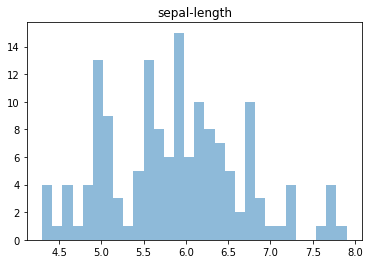

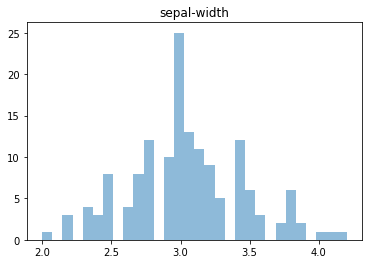

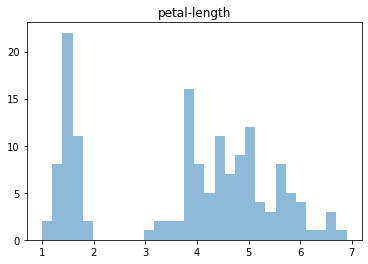

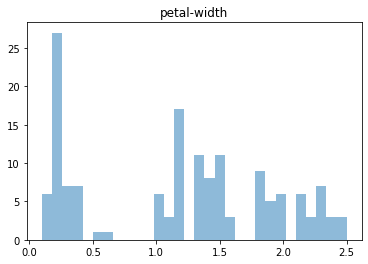

In [127]:
for col in col_name:
    if '-' in col:
        plt.figure()
        plt.hist(df[col], bins=30,alpha = 0.5 )
        plt.title(label = col, loc = 'center')
        

# Assignment 3

##  

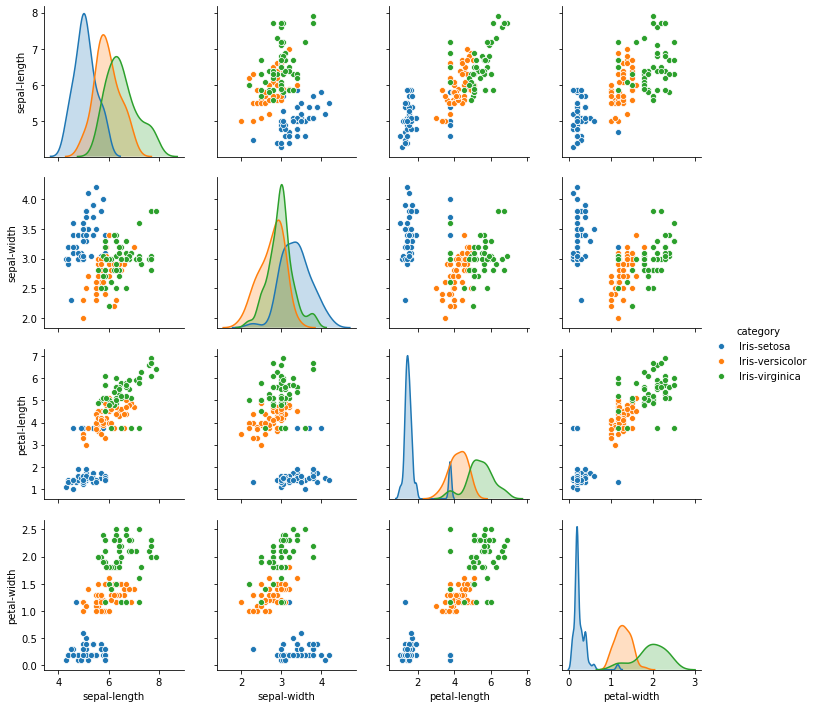

In [128]:
sns.pairplot(df, hue='category')

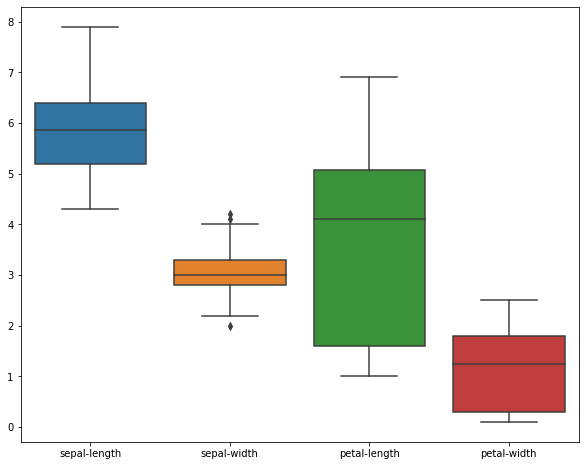

In [129]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient='v')

# Model

#  

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [162]:
kn = KNeighborsClassifier(n_neighbors = 9)

In [163]:
X = df[df.columns[:-1]]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [165]:
pred = kn.predict(X_test)

In [166]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.89      0.94        19
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.92        50
      macro avg       0.93      0.92      0.92        50
   weighted avg       0.94      0.92      0.92        50

[[17  2  0]
 [ 0 15  0]
 [ 0  2 14]]
